In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_csv('df_after_cleaning.csv').drop(['Unnamed: 0', 'source'], axis=1)
df

,postcode,house_is,property_subtype,price,rooms_number,area,equipped_kitchen_has,furnished,open_fire,terrace,...,land_surface,facades_number,swimming_pool_has,region,building_state_agg,postcode_median_price,building_state_median_price,property_subtype_median_price,building_property_subtype_median_facades,property_subtype_median_facades
0,4180,True,MIXED_USE_BUILDING,295000.0,3.0,242.0,True,False,False,True,...,1403.0,NaN,False,W,good,229000.0,320000.0,310000.0,2.0,2.0
1,8730,True,VILLA,675000.0,4.0,349.0,True,False,False,False,...,1526.0,NaN,False,F,good,241000.0,320000.0,540000.0,4.0,4.0
2,4020,True,APARTMENT_BLOCK,250000.0,5.0,303.0,True,False,False,False,...,760.0,NaN,False,W,to_renovate,195000.0,230000.0,357500.0,NaN,NaN
3,1200,True,HOUSE,545000.0,4.0,235.0,True,True,False,False,...,63.0,NaN,False,B,renovated,445000.0,310000.0,288000.0,3.0,3.0
4,1190,True,MIXED_USE_BUILDING,500000.0,2.0,220.0,True,False,False,False,...,193.0,NaN,False,B,good,360000.0,320000.0,310000.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10048,4000,False,APARTMENT,245000.0,2.0,103.0,False,False,False,True,...,0.0,2.0,False,W,good,225000.0,320000.0,282500.0,2.0,2.0
10049,8790,False,APARTMENT,250000.0,1.0,300.0,False,False,False,False,...,0.0,2.0,False,F,good,257000.0,320000.0,282500.0,2.0,2.0
10050,2018,False,APARTMENT,298000.0,1.0,71.0,True,False,False,True,...,0.0,1.0,False,F,good,443475.0,320000.0,282500.0,2.0,2.0
10051,2000,False,FLAT_STUDIO,150000.0,1.0,40.0,True,False,False,False,...,0.0,2.0,False,F,to_renovate,497000.0,230000.0,149000.0,2.0,2.0


In [3]:
df.dtypes

postcode                                      int64
house_is                                       bool
property_subtype                             object
price                                       float64
rooms_number                                float64
area                                        float64
equipped_kitchen_has                           bool
furnished                                      bool
open_fire                                      bool
terrace                                        bool
terrace_area                                float64
garden                                         bool
garden_area                                 float64
land_surface                                float64
facades_number                              float64
swimming_pool_has                              bool
region                                       object
building_state_agg                           object
postcode_median_price                       float64
building_sta

In [4]:
# keeping only numerical features for this test
features_to_delete = ['postcode', 'house_is', 'property_subtype', 'equipped_kitchen_has', 'furnished', 'open_fire', 'terrace', 'terrace_area', 'garden', 'garden_area', 'facades_number', 'swimming_pool_has', 'region', 'building_state_agg']
df.drop(features_to_delete, axis=1, inplace=True)
df

,price,rooms_number,area,land_surface,postcode_median_price,building_state_median_price,property_subtype_median_price,building_property_subtype_median_facades,property_subtype_median_facades
0,295000.0,3.0,242.0,1403.0,229000.0,320000.0,310000.0,2.0,2.0
1,675000.0,4.0,349.0,1526.0,241000.0,320000.0,540000.0,4.0,4.0
2,250000.0,5.0,303.0,760.0,195000.0,230000.0,357500.0,NaN,NaN
3,545000.0,4.0,235.0,63.0,445000.0,310000.0,288000.0,3.0,3.0
4,500000.0,2.0,220.0,193.0,360000.0,320000.0,310000.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...
10048,245000.0,2.0,103.0,0.0,225000.0,320000.0,282500.0,2.0,2.0
10049,250000.0,1.0,300.0,0.0,257000.0,320000.0,282500.0,2.0,2.0
10050,298000.0,1.0,71.0,0.0,443475.0,320000.0,282500.0,2.0,2.0
10051,150000.0,1.0,40.0,0.0,497000.0,230000.0,149000.0,2.0,2.0


In [5]:
df.dropna(axis=0, inplace=True)
df

,price,rooms_number,area,land_surface,postcode_median_price,building_state_median_price,property_subtype_median_price,building_property_subtype_median_facades,property_subtype_median_facades
0,295000.0,3.0,242.0,1403.0,229000.0,320000.0,310000.0,2.0,2.0
1,675000.0,4.0,349.0,1526.0,241000.0,320000.0,540000.0,4.0,4.0
3,545000.0,4.0,235.0,63.0,445000.0,310000.0,288000.0,3.0,3.0
4,500000.0,2.0,220.0,193.0,360000.0,320000.0,310000.0,2.0,2.0
5,189000.0,3.0,200.0,100.0,229000.0,230000.0,288000.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
10048,245000.0,2.0,103.0,0.0,225000.0,320000.0,282500.0,2.0,2.0
10049,250000.0,1.0,300.0,0.0,257000.0,320000.0,282500.0,2.0,2.0
10050,298000.0,1.0,71.0,0.0,443475.0,320000.0,282500.0,2.0,2.0
10051,150000.0,1.0,40.0,0.0,497000.0,230000.0,149000.0,2.0,2.0


In [6]:
X = df.loc[:, df.columns != 'price'].to_numpy()
y = df['price'].to_numpy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4444, test_size=0.2)

In [8]:
X_train, y_train, X_test, y_test

(array([[3.000e+00, 1.250e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [3.000e+00, 1.160e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [2.000e+00, 8.600e+01, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        ...,
        [3.000e+00, 1.130e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [1.000e+00, 5.900e+01, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [2.000e+00, 1.150e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00]]),
 array([285000., 345000., 289500., ..., 545000., 115000., 329000.]),
 array([[3.000e+00, 1.600e+02, 4.400e+02, ..., 2.880e+05, 3.000e+00,
         3.000e+00],
        [3.000e+00, 1.900e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        [2.000e+00, 1.970e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
         2.000e+00],
        ...,
        [1.000e+00, 1.100e+02, 1.100e+02, ..., 2.880e+05, 3.000e+00,
         3.000e+00],
   

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

score_train = lin_reg.score(X_train, y_train)
score_test = lin_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6242022626845257
test score:	0.5989326427282686


In [10]:
np.random.seed(4444)

sgd_reg = SGDRegressor()
sgd_reg.fit(X_train, y_train)
score_train = sgd_reg.score(X_train, y_train)
score_test = sgd_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	-1.0424810304919478e+29
test score:	-1.0732132456067988e+29


In [11]:
degree = 1
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6242022626845257
test score:	0.5989326427282167


In [12]:
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6703932493336051
test score:	0.626174224874755


In [13]:
degree = 3
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6883819849692823
test score:	0.6388119869221324


In [14]:
degree = 4
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7135329598027893
test score:	0.6349783989655258


In [15]:
degree = 5
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7272745427130718
test score:	0.5487414329150007


In [16]:
degree = 6
poly_reg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7349731275963831
test score:	-0.639364357600601


In [17]:
poly_reg.get_params()

{'memory': None,
 'steps': [('polynomialfeatures', PolynomialFeatures(degree=6)),
  ('linearregression', LinearRegression())],
 'verbose': False,
 'polynomialfeatures': PolynomialFeatures(degree=6),
 'linearregression': LinearRegression(),
 'polynomialfeatures__degree': 6,
 'polynomialfeatures__include_bias': True,
 'polynomialfeatures__interaction_only': False,
 'polynomialfeatures__order': 'C',
 'linearregression__copy_X': True,
 'linearregression__fit_intercept': True,
 'linearregression__n_jobs': None,
 'linearregression__normalize': False}

In [18]:
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [19]:
np.random.seed(4)
degree_range = np.arange(1,5)
k = 5
train_scores, valid_scores = validation_curve(pipe,
                                              X_train, y_train,
                                              param_name='polynomialfeatures__degree',
                                              param_range=degree_range,
                                              cv=k)

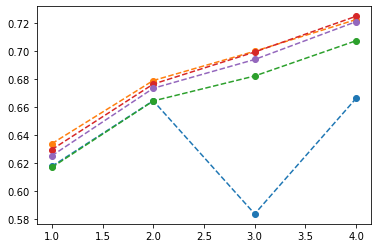

In [20]:
plt.plot(degree_range, train_scores,  marker='o', linestyle='--')

In [21]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0.5, 1.0, 'Validation Curve with Polynomial Regression\n5-fold Cross-Validation')

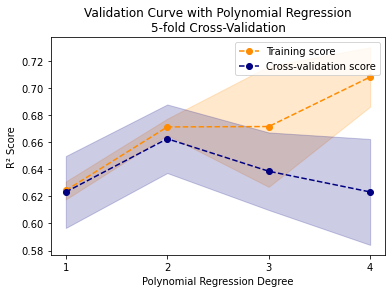

In [22]:
plt.plot(degree_range, train_scores_mean, color="darkorange",   marker='o', linestyle='--', label= 'Training score')
plt.fill_between(degree_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(degree_range, valid_scores_mean, color="navy",   marker='o', linestyle='--', label='Cross-validation score')
plt.fill_between(degree_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(degree_range)
plt.xlabel('Polynomial Regression Degree')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.title(f'Validation Curve with Polynomial Regression\n{k}-fold Cross-Validation')

In [23]:
train_scores_mean

array([0.62440262, 0.67133473, 0.67161357, 0.7082434 ])

In [24]:
valid_scores_mean

array([0.62324154, 0.66259325, 0.63860798, 0.62330487])

In [25]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [26]:
degree = 1
poly_reg = make_pipeline(RobustScaler(), PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6242022626845257
test score:	0.5989326427282673


In [27]:
degree = 2
poly_reg = make_pipeline(RobustScaler(), PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6703932493497766
test score:	0.6261740763755237


In [28]:
degree = 3
poly_reg = make_pipeline(RobustScaler(), PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6941828205866645
test score:	0.644038963104135


In [29]:
degree = 4
poly_reg = make_pipeline(RobustScaler(), PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7243091532552328
test score:	0.6279594276428686


In [30]:
degree = 5
poly_reg = make_pipeline(RobustScaler(), PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7611825096687403
test score:	-54.171994225564106


In [31]:
degree = 6
poly_reg = make_pipeline(RobustScaler(), PolynomialFeatures(degree), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.8005742634003287
test score:	-3083116135.139662


In [32]:
pipe = make_pipeline(RobustScaler(), PolynomialFeatures(), LinearRegression())
np.random.seed(4)
degree_range = np.arange(1,5)
k = 5
train_scores, valid_scores = validation_curve(pipe,
                                              X_train, y_train,
                                              param_name='polynomialfeatures__degree',
                                              param_range=degree_range,
                                              cv=k)

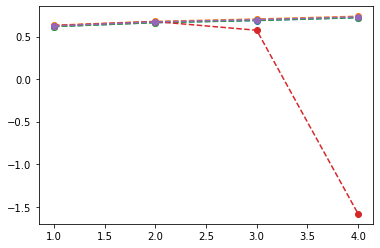

In [33]:
plt.plot(degree_range, train_scores,  marker='o', linestyle='--')

In [34]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0.5, 1.0, 'Validation Curve with Polynomial Regression\n5-fold Cross-Validation')

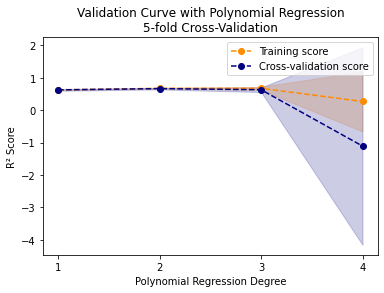

In [35]:
plt.plot(degree_range, train_scores_mean, color="darkorange",   marker='o', linestyle='--', label= 'Training score')
plt.fill_between(degree_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(degree_range, valid_scores_mean, color="navy",   marker='o', linestyle='--', label='Cross-validation score')
plt.fill_between(degree_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(degree_range)
plt.xlabel('Polynomial Regression Degree')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.title(f'Validation Curve with Polynomial Regression\n{k}-fold Cross-Validation')

In [36]:
train_scores_mean

array([0.62440262, 0.67133473, 0.67145609, 0.26624699])

In [37]:
valid_scores_mean

array([ 0.62324154,  0.66259335,  0.62831891, -1.10827108])

In [38]:
X_train

array([[3.000e+00, 1.250e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
        2.000e+00],
       [3.000e+00, 1.160e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
        2.000e+00],
       [2.000e+00, 8.600e+01, 0.000e+00, ..., 2.825e+05, 2.000e+00,
        2.000e+00],
       ...,
       [3.000e+00, 1.130e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
        2.000e+00],
       [1.000e+00, 5.900e+01, 0.000e+00, ..., 2.825e+05, 2.000e+00,
        2.000e+00],
       [2.000e+00, 1.150e+02, 0.000e+00, ..., 2.825e+05, 2.000e+00,
        2.000e+00]])

In [39]:
degree = 1
poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6242022626845257
test score:	0.5989326427282673


In [40]:
degree = 2
poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6703932493497766
test score:	0.6261740763755217


In [41]:
degree = 3
poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.6941828205866645
test score:	0.6440389631041081


In [42]:
degree = 4
poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7243091532552348
test score:	0.6279594276347213


In [43]:
degree = 5
poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.7611825096690341
test score:	-13.082555350507953


In [44]:
degree = 6
poly_reg = make_pipeline(PolynomialFeatures(degree), RobustScaler(), LinearRegression())

poly_reg.fit(X_train, y_train)
score_train = poly_reg.score(X_train, y_train)
score_test = poly_reg.score(X_test, y_test)
print(f'train score:\t{score_train}\ntest score:\t{score_test}')

train score:	0.8005998076107039
test score:	-202059827.6519636


In [45]:
pipe = make_pipeline(PolynomialFeatures(), RobustScaler(),LinearRegression())
np.random.seed(4)
degree_range = np.arange(1,5)
k = 5
train_scores, valid_scores = validation_curve(pipe,
                                              X_train, y_train,
                                              param_name='polynomialfeatures__degree',
                                              param_range=degree_range,
                                              cv=k)

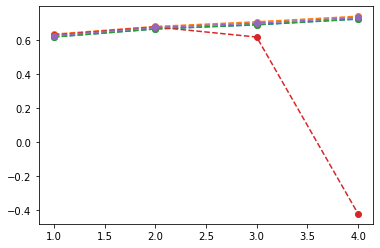

In [46]:
plt.plot(degree_range, train_scores,  marker='o', linestyle='--')

In [47]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

Text(0.5, 1.0, 'Validation Curve with Polynomial Regression\n5-fold Cross-Validation')

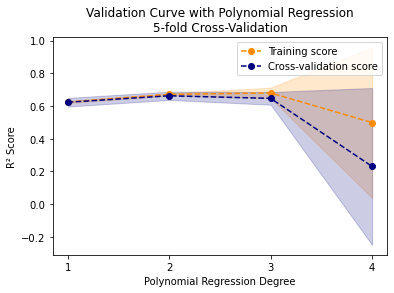

In [48]:
plt.plot(degree_range, train_scores_mean, color="darkorange",   marker='o', linestyle='--', label= 'Training score')
plt.fill_between(degree_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(degree_range, valid_scores_mean, color="navy",   marker='o', linestyle='--', label='Cross-validation score')
plt.fill_between(degree_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(degree_range)
plt.xlabel('Polynomial Regression Degree')
plt.ylabel('R² Score')
plt.legend(loc='best')
plt.title(f'Validation Curve with Polynomial Regression\n{k}-fold Cross-Validation')

In [49]:
train_scores_mean

array([0.62440262, 0.67133473, 0.67993893, 0.49882559])

In [50]:
valid_scores_mean

array([0.62324154, 0.66259335, 0.64672289, 0.23075959])

In [51]:
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(PolynomialFeatures(degree=1), RobustScaler(),LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5)
np.mean(scores)

0.5929125708701279

In [52]:
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(PolynomialFeatures(degree=2), RobustScaler(),LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5)
np.mean(scores)

0.627983505971484

In [53]:
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(PolynomialFeatures(degree=3), RobustScaler(),LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5)
np.mean(scores)

0.6450558929005877

In [54]:
from sklearn.model_selection import cross_val_score
pipe = make_pipeline(PolynomialFeatures(degree=5), RobustScaler(),LinearRegression())
scores = cross_val_score(pipe, X, y, cv=5)
np.mean(scores)

-147.71819619226127